# Dados e Aprendizagem Automática
### Part V

## **II - Decision Tree using Incidents Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
incid = pd.read_csv("incidents.csv", na_filter=False)

**EDA**

In [29]:
incid.

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [30]:
incid.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      5000 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


Drop columns that do not bring value

In [4]:
incid.drop(['affected_roads'], axis = 1, inplace = True)
incid.drop(['avg_precipitation'], axis = 1, inplace = True)
incid.drop('city_name',axis=1,inplace=True)
incid.dropna(inplace=True)

Factorization

In [5]:
incid['incidents'] = pd.factorize(incid['incidents'])[0] + 1
incid['magnitude_of_delay'] = pd.factorize(incid['magnitude_of_delay'])[0] + 1
incid['luminosity'] = pd.factorize(incid['luminosity'])[0] + 1
incid['avg_rain'] = pd.factorize(incid['avg_rain'])[0] + 1

In [6]:
incid['record_date'] = pd.to_datetime(incid['record_date'], format = '%Y-%m-%d %H:%M', errors='coerce')

In [7]:
incid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   magnitude_of_delay  5000 non-null   int64         
 1   delay_in_seconds    5000 non-null   int64         
 2   record_date         5000 non-null   datetime64[ns]
 3   luminosity          5000 non-null   int64         
 4   avg_temperature     5000 non-null   float64       
 5   avg_atm_pressure    5000 non-null   float64       
 6   avg_humidity        5000 non-null   float64       
 7   avg_wind_speed      5000 non-null   float64       
 8   avg_rain            5000 non-null   int64         
 9   incidents           5000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 390.8 KB


In [8]:
incid.head()

,magnitude_of_delay,delay_in_seconds,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,1,0,2021-03-15 23:00:00,1,12.0,1013.0,70.0,1.0,1,1
1,1,385,2021-12-25 18:00:00,1,12.0,1007.0,91.0,1.0,1,1
2,1,69,2021-03-12 15:00:00,2,14.0,1025.0,64.0,0.0,1,2
3,2,2297,2021-09-29 09:00:00,2,15.0,1028.0,75.0,1.0,1,3
4,1,0,2021-06-13 11:00:00,2,27.0,1020.0,52.0,1.0,1,4


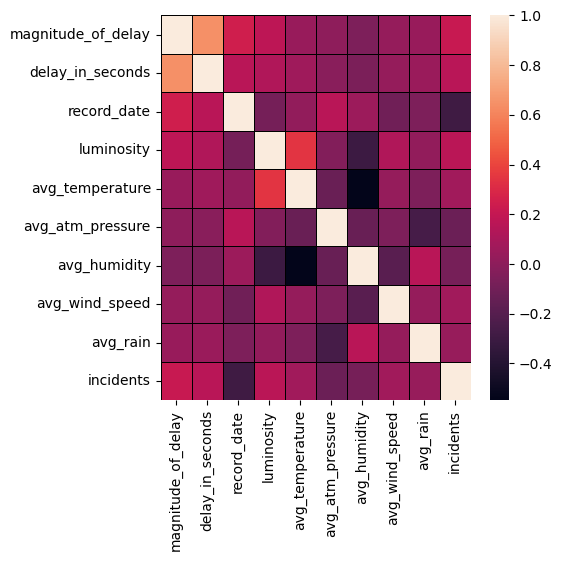

In [11]:
fig = plt.figure(figsize = (5,5))
incidents_corr = incid.corr( method = "pearson")
sns.heatmap(incidents_corr, linecolor='black', linewidths=0.5)
plt.show()

- <em>magnitude_of_delay</em> and <em>delay_in_seconds</em>
- <em>magnitude_of_delay</em> and <em>record_date</em>
- <em>avg_humidity</em> and <em>luminosity<em>

In [12]:
sns_plot = sns.pairplot(incid, hue="incidents")
#sns_plot.savefig()

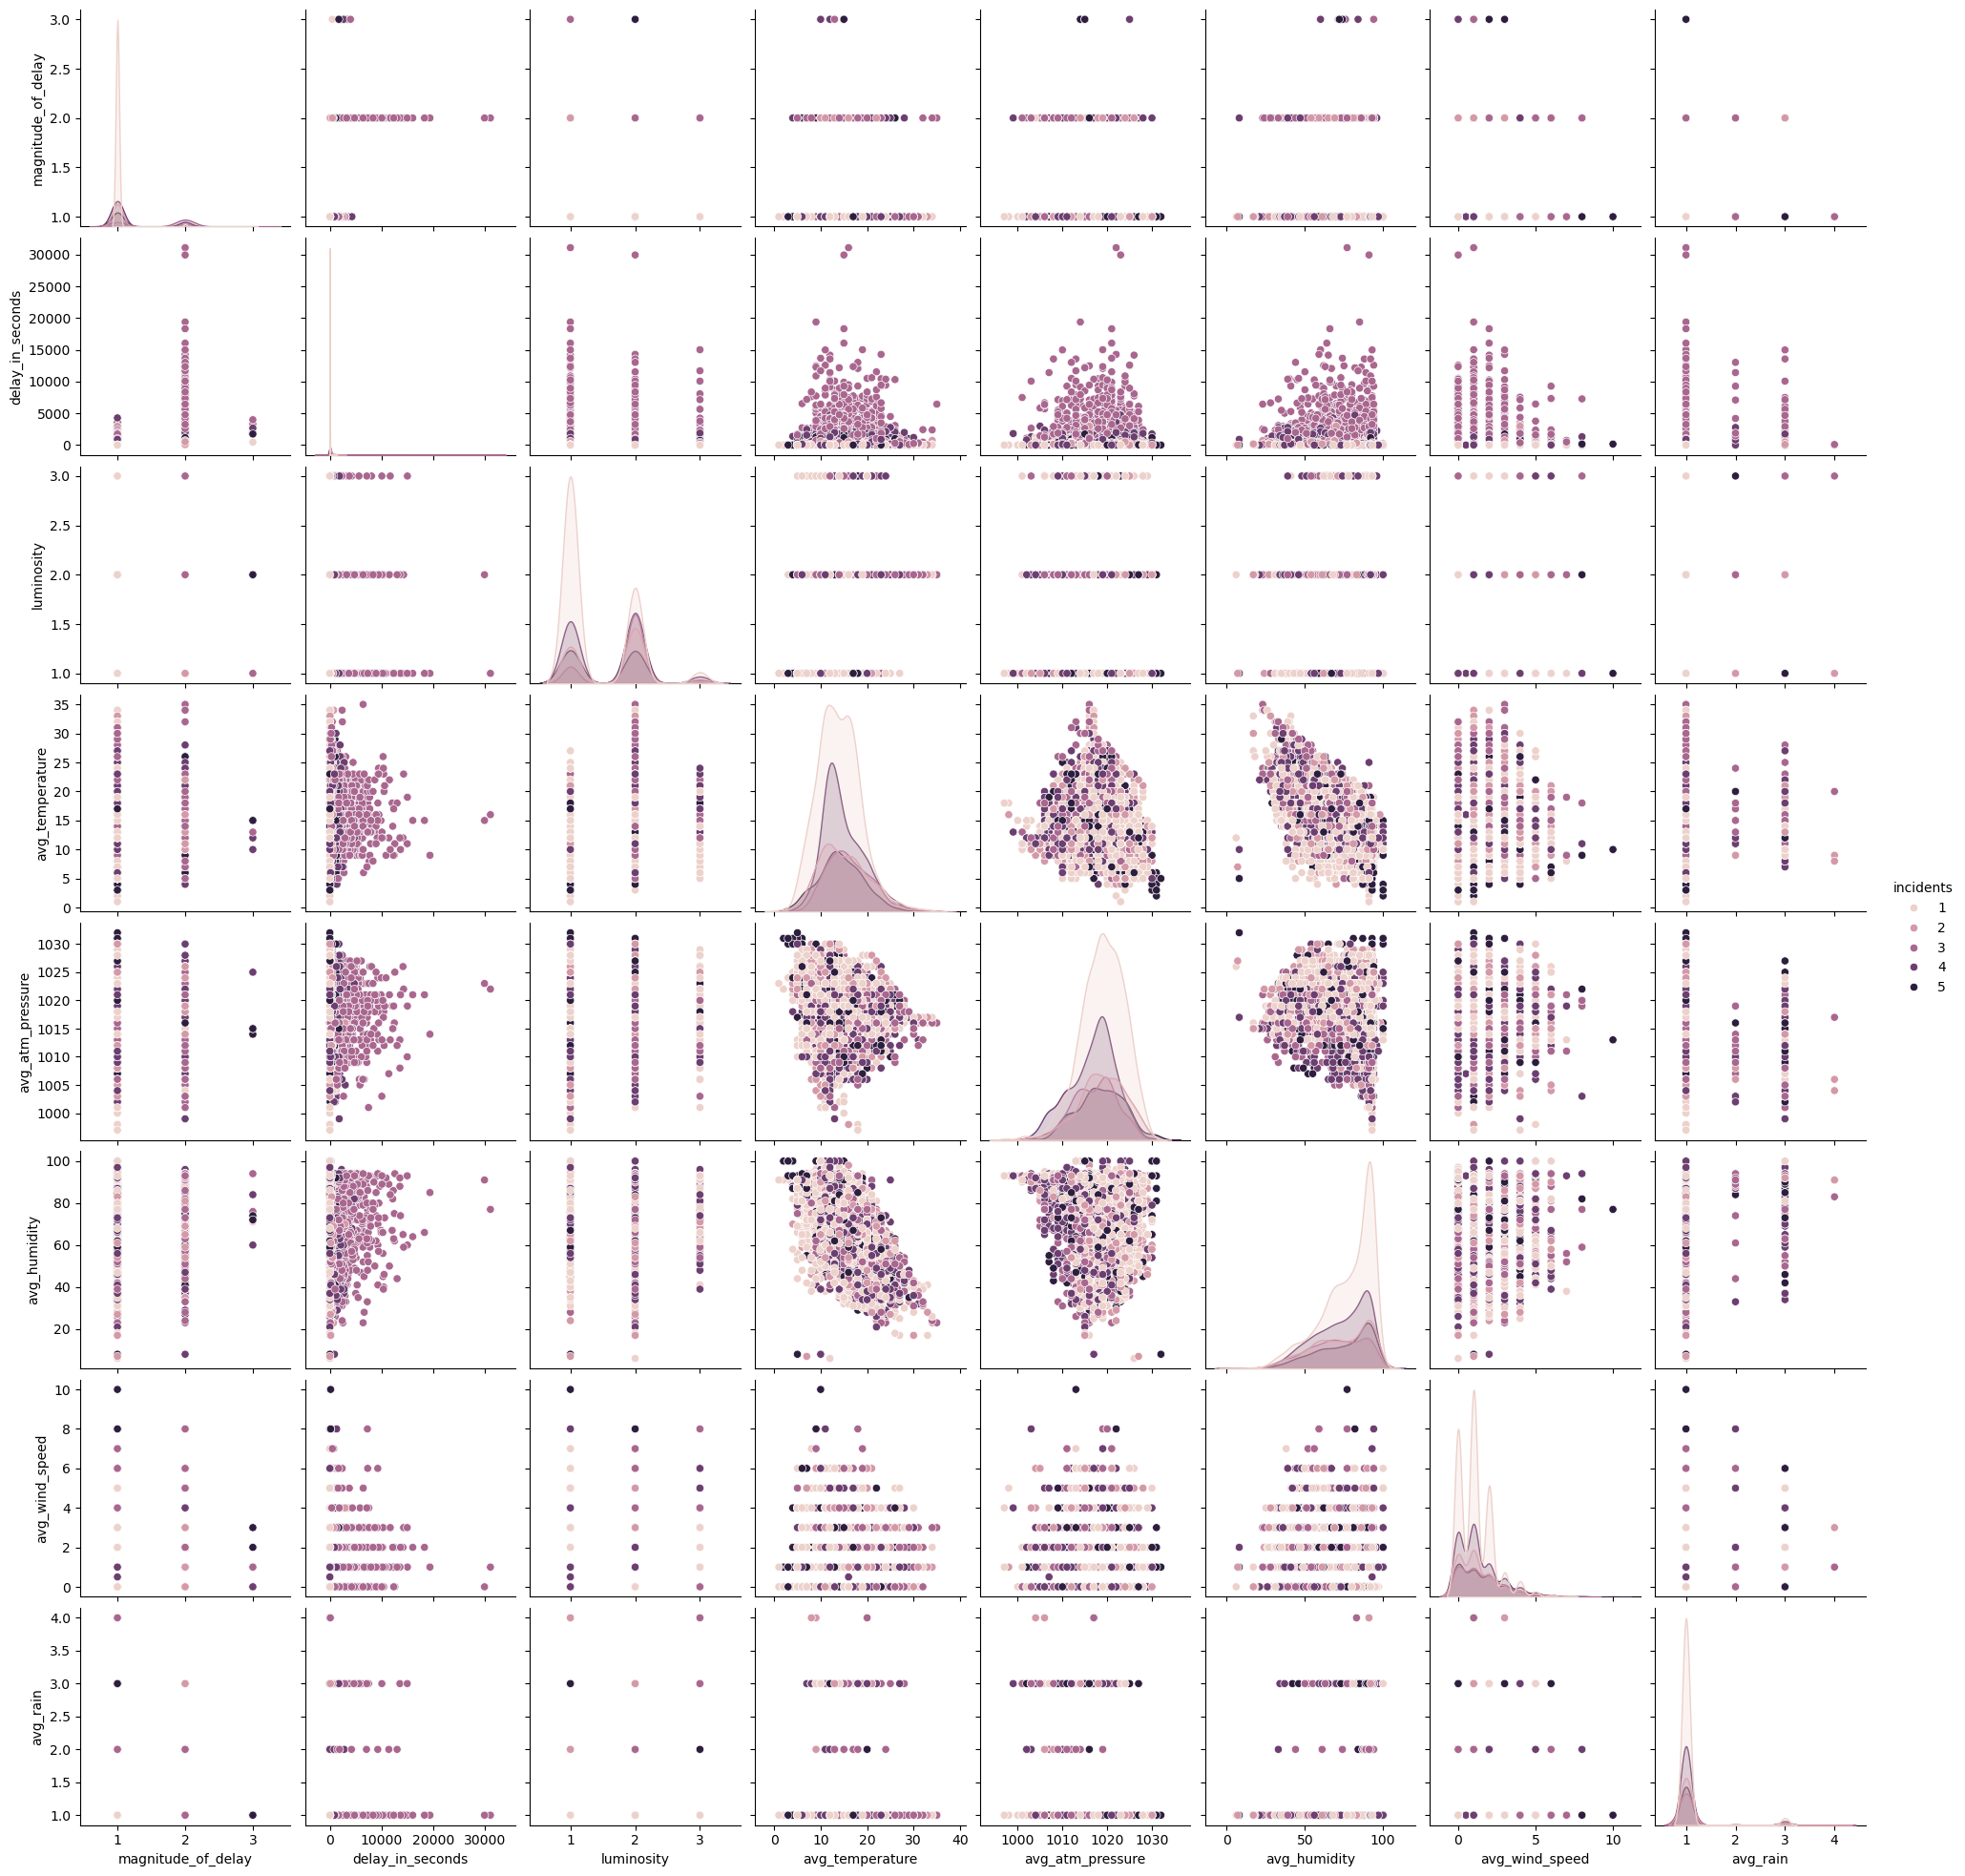

In [13]:
plt.show()

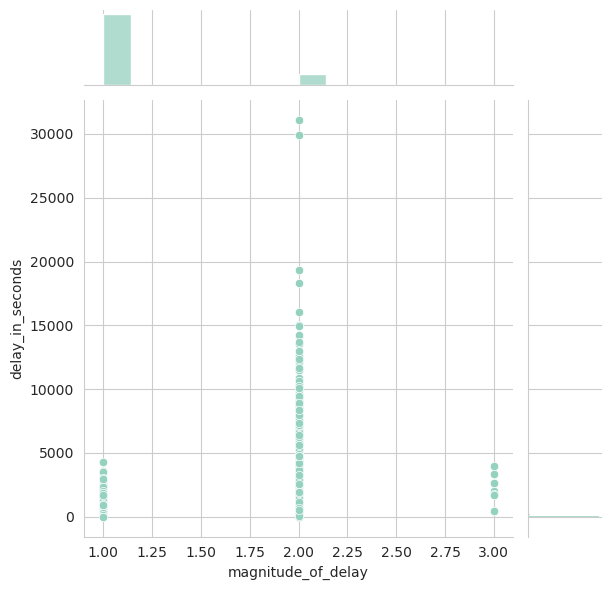

In [14]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='magnitude_of_delay', y='delay_in_seconds', data= incid)
plt.show()

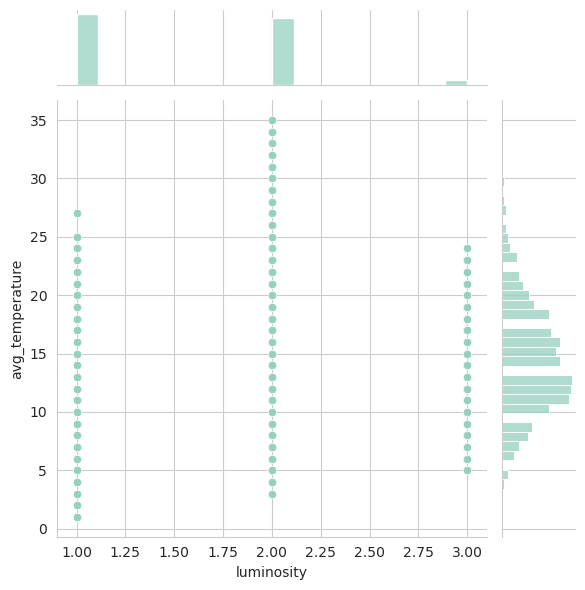

In [17]:
sns.jointplot(x='luminosity', y='avg_temperature', data=incid)
plt.show()

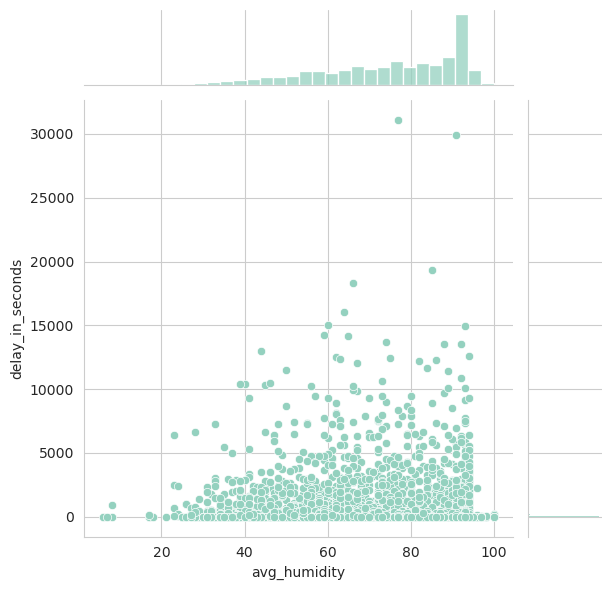

In [20]:
sns.jointplot(x='avg_humidity', y='delay_in_seconds', data=incid)
plt.show()

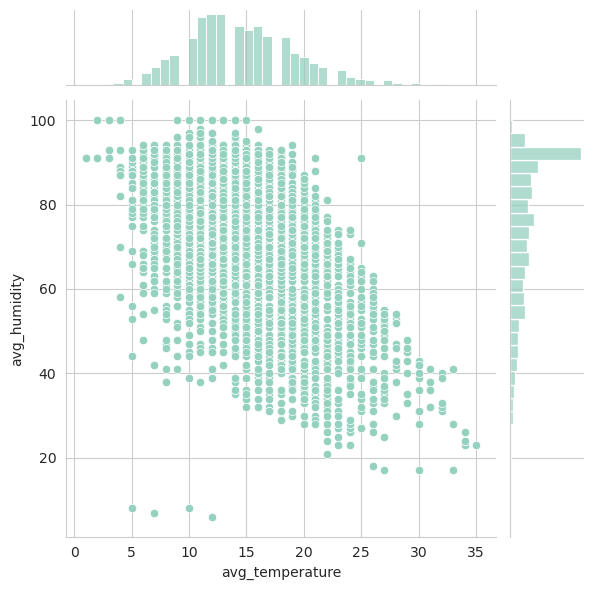

In [21]:
sns.jointplot(x='avg_temperature', y='avg_humidity', data=incid)
plt.show()

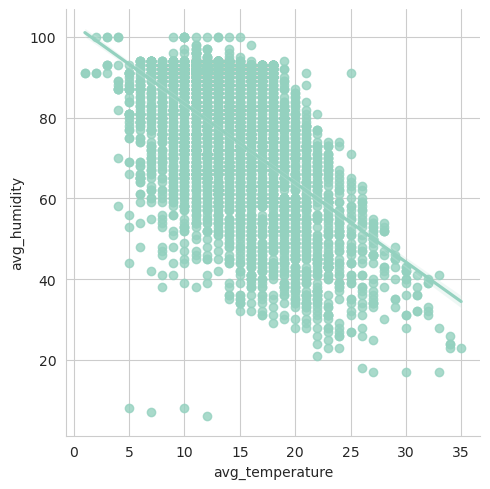

In [22]:
sns.lmplot(x='avg_temperature', y='avg_humidity', data=incid)
plt.show()

*Split the data*

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = incid.drop(['record_date', 'incidents'], axis=1)
y = incid["incidents"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=2022)

*Train the model*

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

<code>sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)</code>

In [29]:
dt_model = DecisionTreeClassifier(random_state=2022)

In [30]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2022)

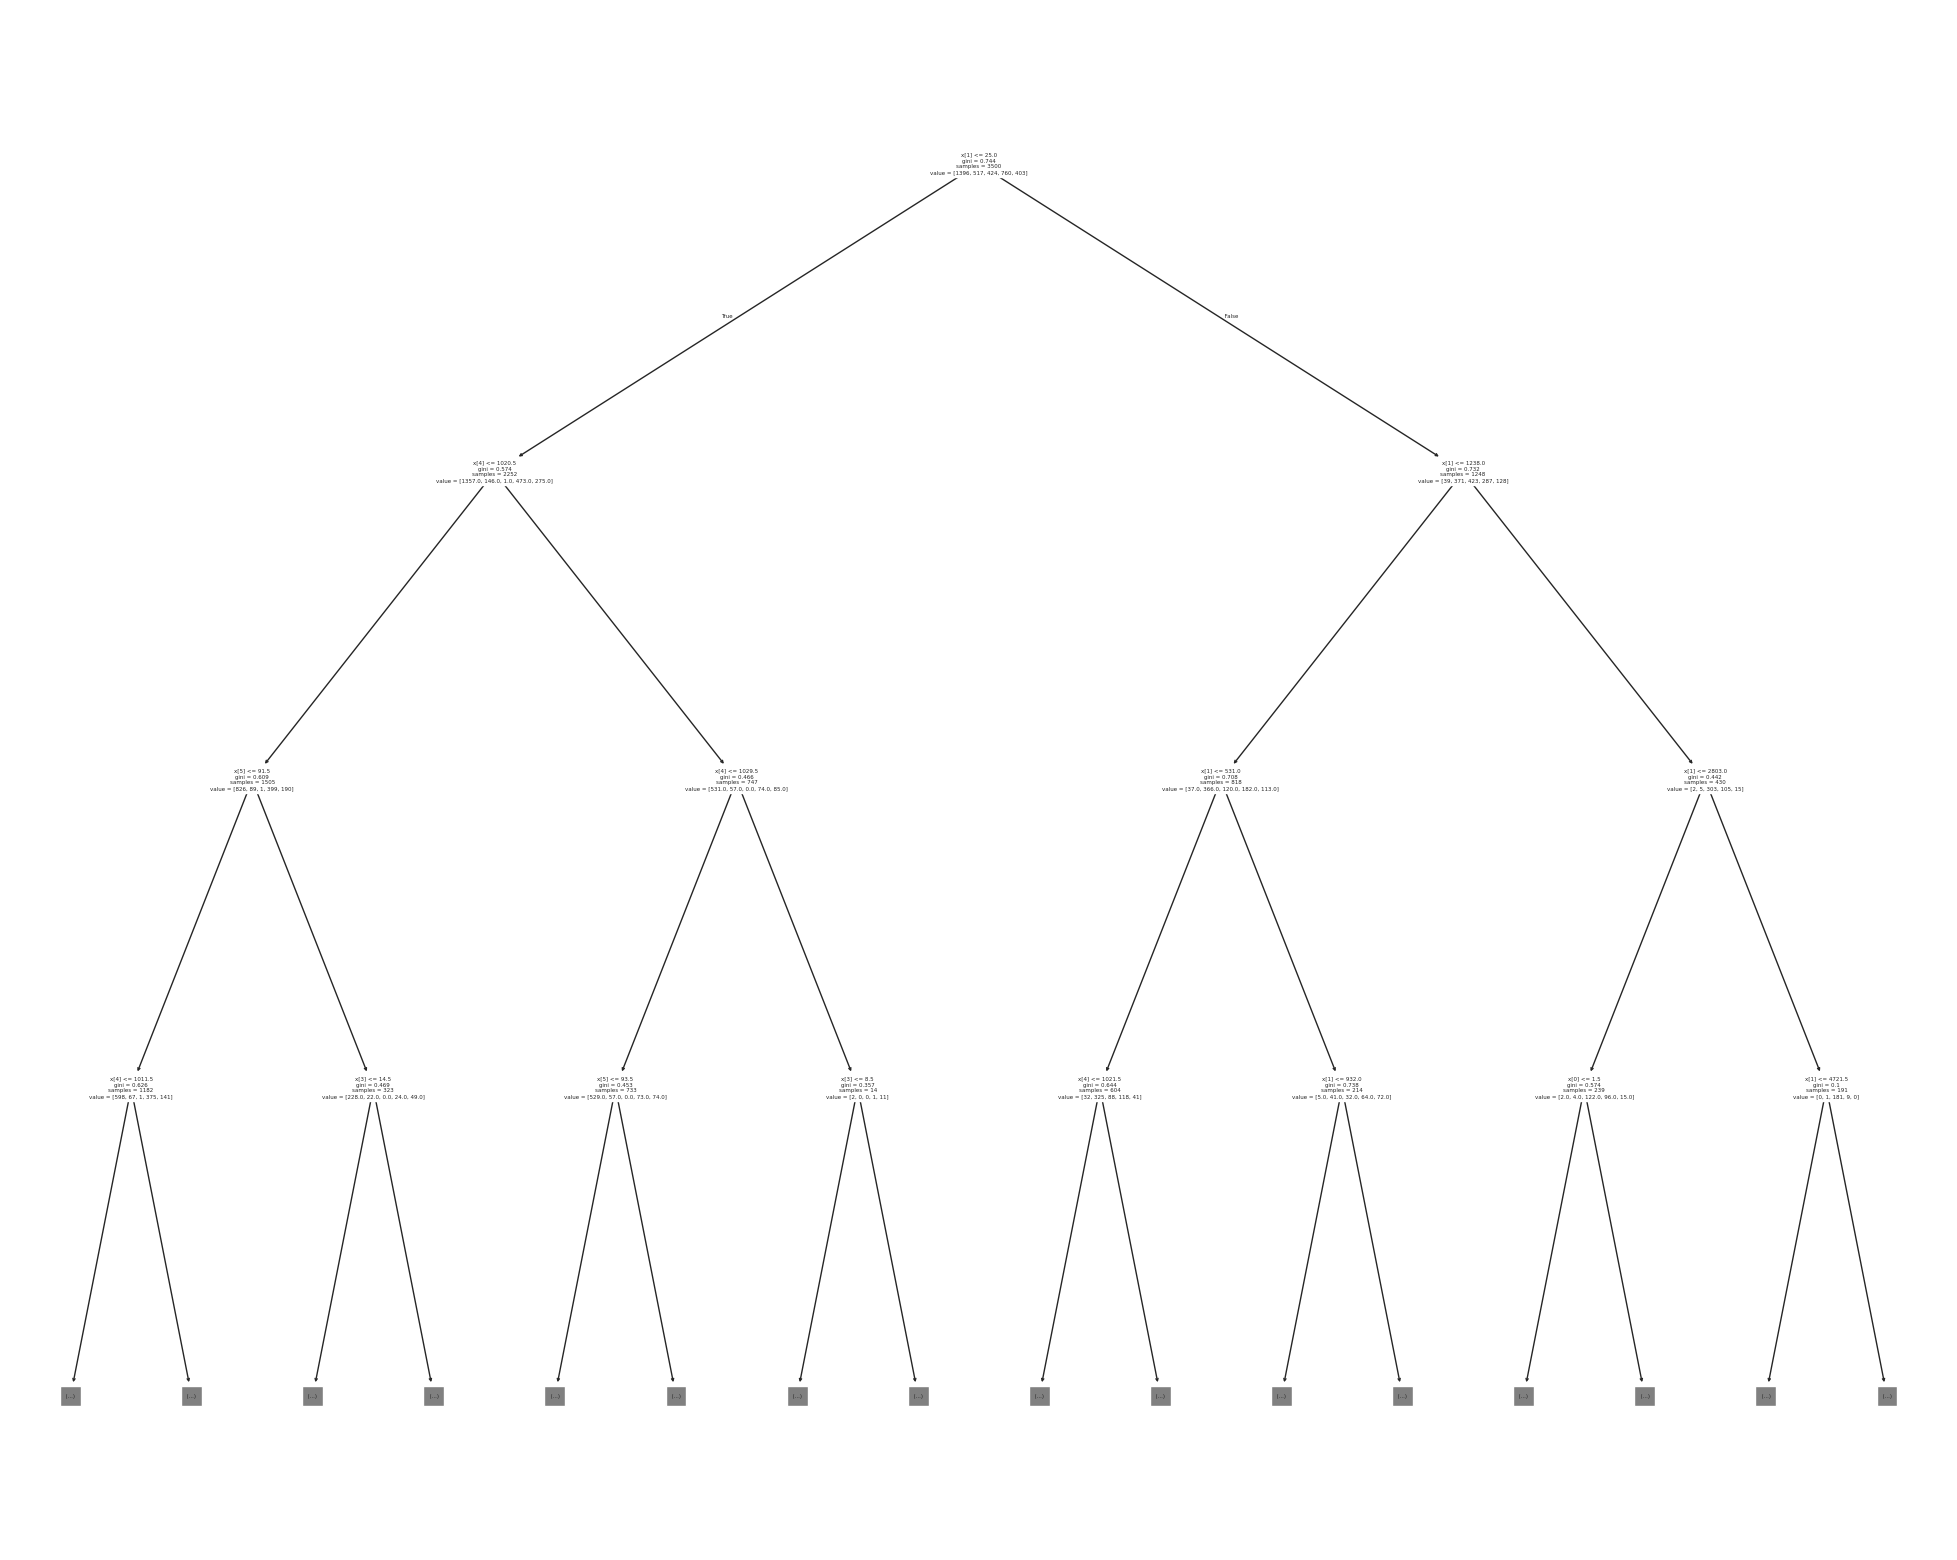

In [31]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt_model, max_depth = 3)
plt.show()

#fig.savefig()

In [32]:
text_representation = tree.export_text(dt_model)
print(text_representation)

with open("dt_text.log", "w") as fout:
    fout.write(text_representation)

|--- feature_1 <= 25.00
|   |--- feature_4 <= 1020.50
|   |   |--- feature_5 <= 91.50
|   |   |   |--- feature_4 <= 1011.50
|   |   |   |   |--- feature_3 <= 15.50
|   |   |   |   |   |--- feature_3 <= 11.50
|   |   |   |   |   |   |--- feature_6 <= 1.50
|   |   |   |   |   |   |   |--- feature_4 <= 1002.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  1002.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 10.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  10.50
|   |   |   |   |   |   |  

*Predictions*

In [34]:
dt_predictions = dt_model.predict(X_test)

*Model Evaluation*

In [35]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [36]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           1       0.75      0.74      0.74       632
           2       0.58      0.55      0.56       201
           3       0.72      0.73      0.73       179
           4       0.46      0.49      0.47       313
           5       0.40      0.42      0.41       175

    accuracy                           0.62      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.62      0.62      0.62      1500



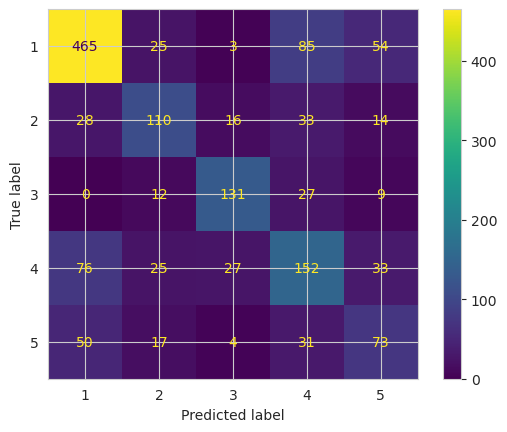

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_predictions)
plt.show()

## **III - Hyperparamenter tuning with GridSearch**

<code>sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)</code>

In [38]:
from sklearn.model_selection import GridSearchCV

*Depth of the tree and number of leaves obtained from the previous model*

In [39]:
print(dt_model.get_depth())
print(dt_model.get_n_leaves())

24
1189


*Hyperparameters to test: **criterion** and **max_depth***

In [40]:
param_grid_dt = {'criterion': ["gini","entropy"], 'max_depth': [1,2,3,4,5,6,7,8,9,10]}
estimator_dt = DecisionTreeClassifier(random_state=2022)
grid_dt = GridSearchCV(estimator_dt, param_grid_dt, refit=True,verbose=2)

In [41]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

/home/eduardoascunha/miniconda3/envs/envNAME/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

*Model evaluation*

In [43]:
grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

In [45]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           1       0.68      0.93      0.78       632
           2       0.55      0.71      0.62       201
           3       0.79      0.75      0.77       179
           4       0.52      0.22      0.31       313
           5       0.40      0.16      0.23       175

    accuracy                           0.64      1500
   macro avg       0.59      0.55      0.54      1500
weighted avg       0.61      0.64      0.60      1500



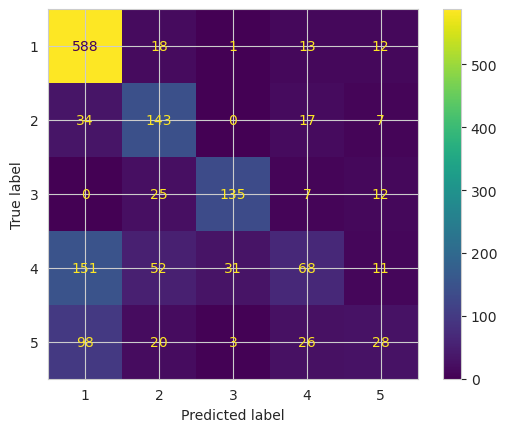

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_dt.predict(X_test))
plt.show()

## **IV - Decision Tree Pruning**

*Tree max depth*

In [48]:
max_depth = dt_model.get_depth()
max_depth

24

*Pré-pruning: **max_depth***

In [49]:
param_grid_pru = {'max_depth': [max_depth for max_depth in range(1, max_depth + 1)]}
estimator_pru = DecisionTreeClassifier(random_state=2022)
max_depth_gs = GridSearchCV(estimator_pru, param_grid_pru)

In [50]:
max_depth_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24]})

*Best parameters and estimator configuration*

In [51]:
max_depth_gs.best_params_

{'max_depth': 6}

In [52]:
max_depth_tree = max_depth_gs.best_estimator_
print(max_depth_tree)

DecisionTreeClassifier(max_depth=6, random_state=2022)


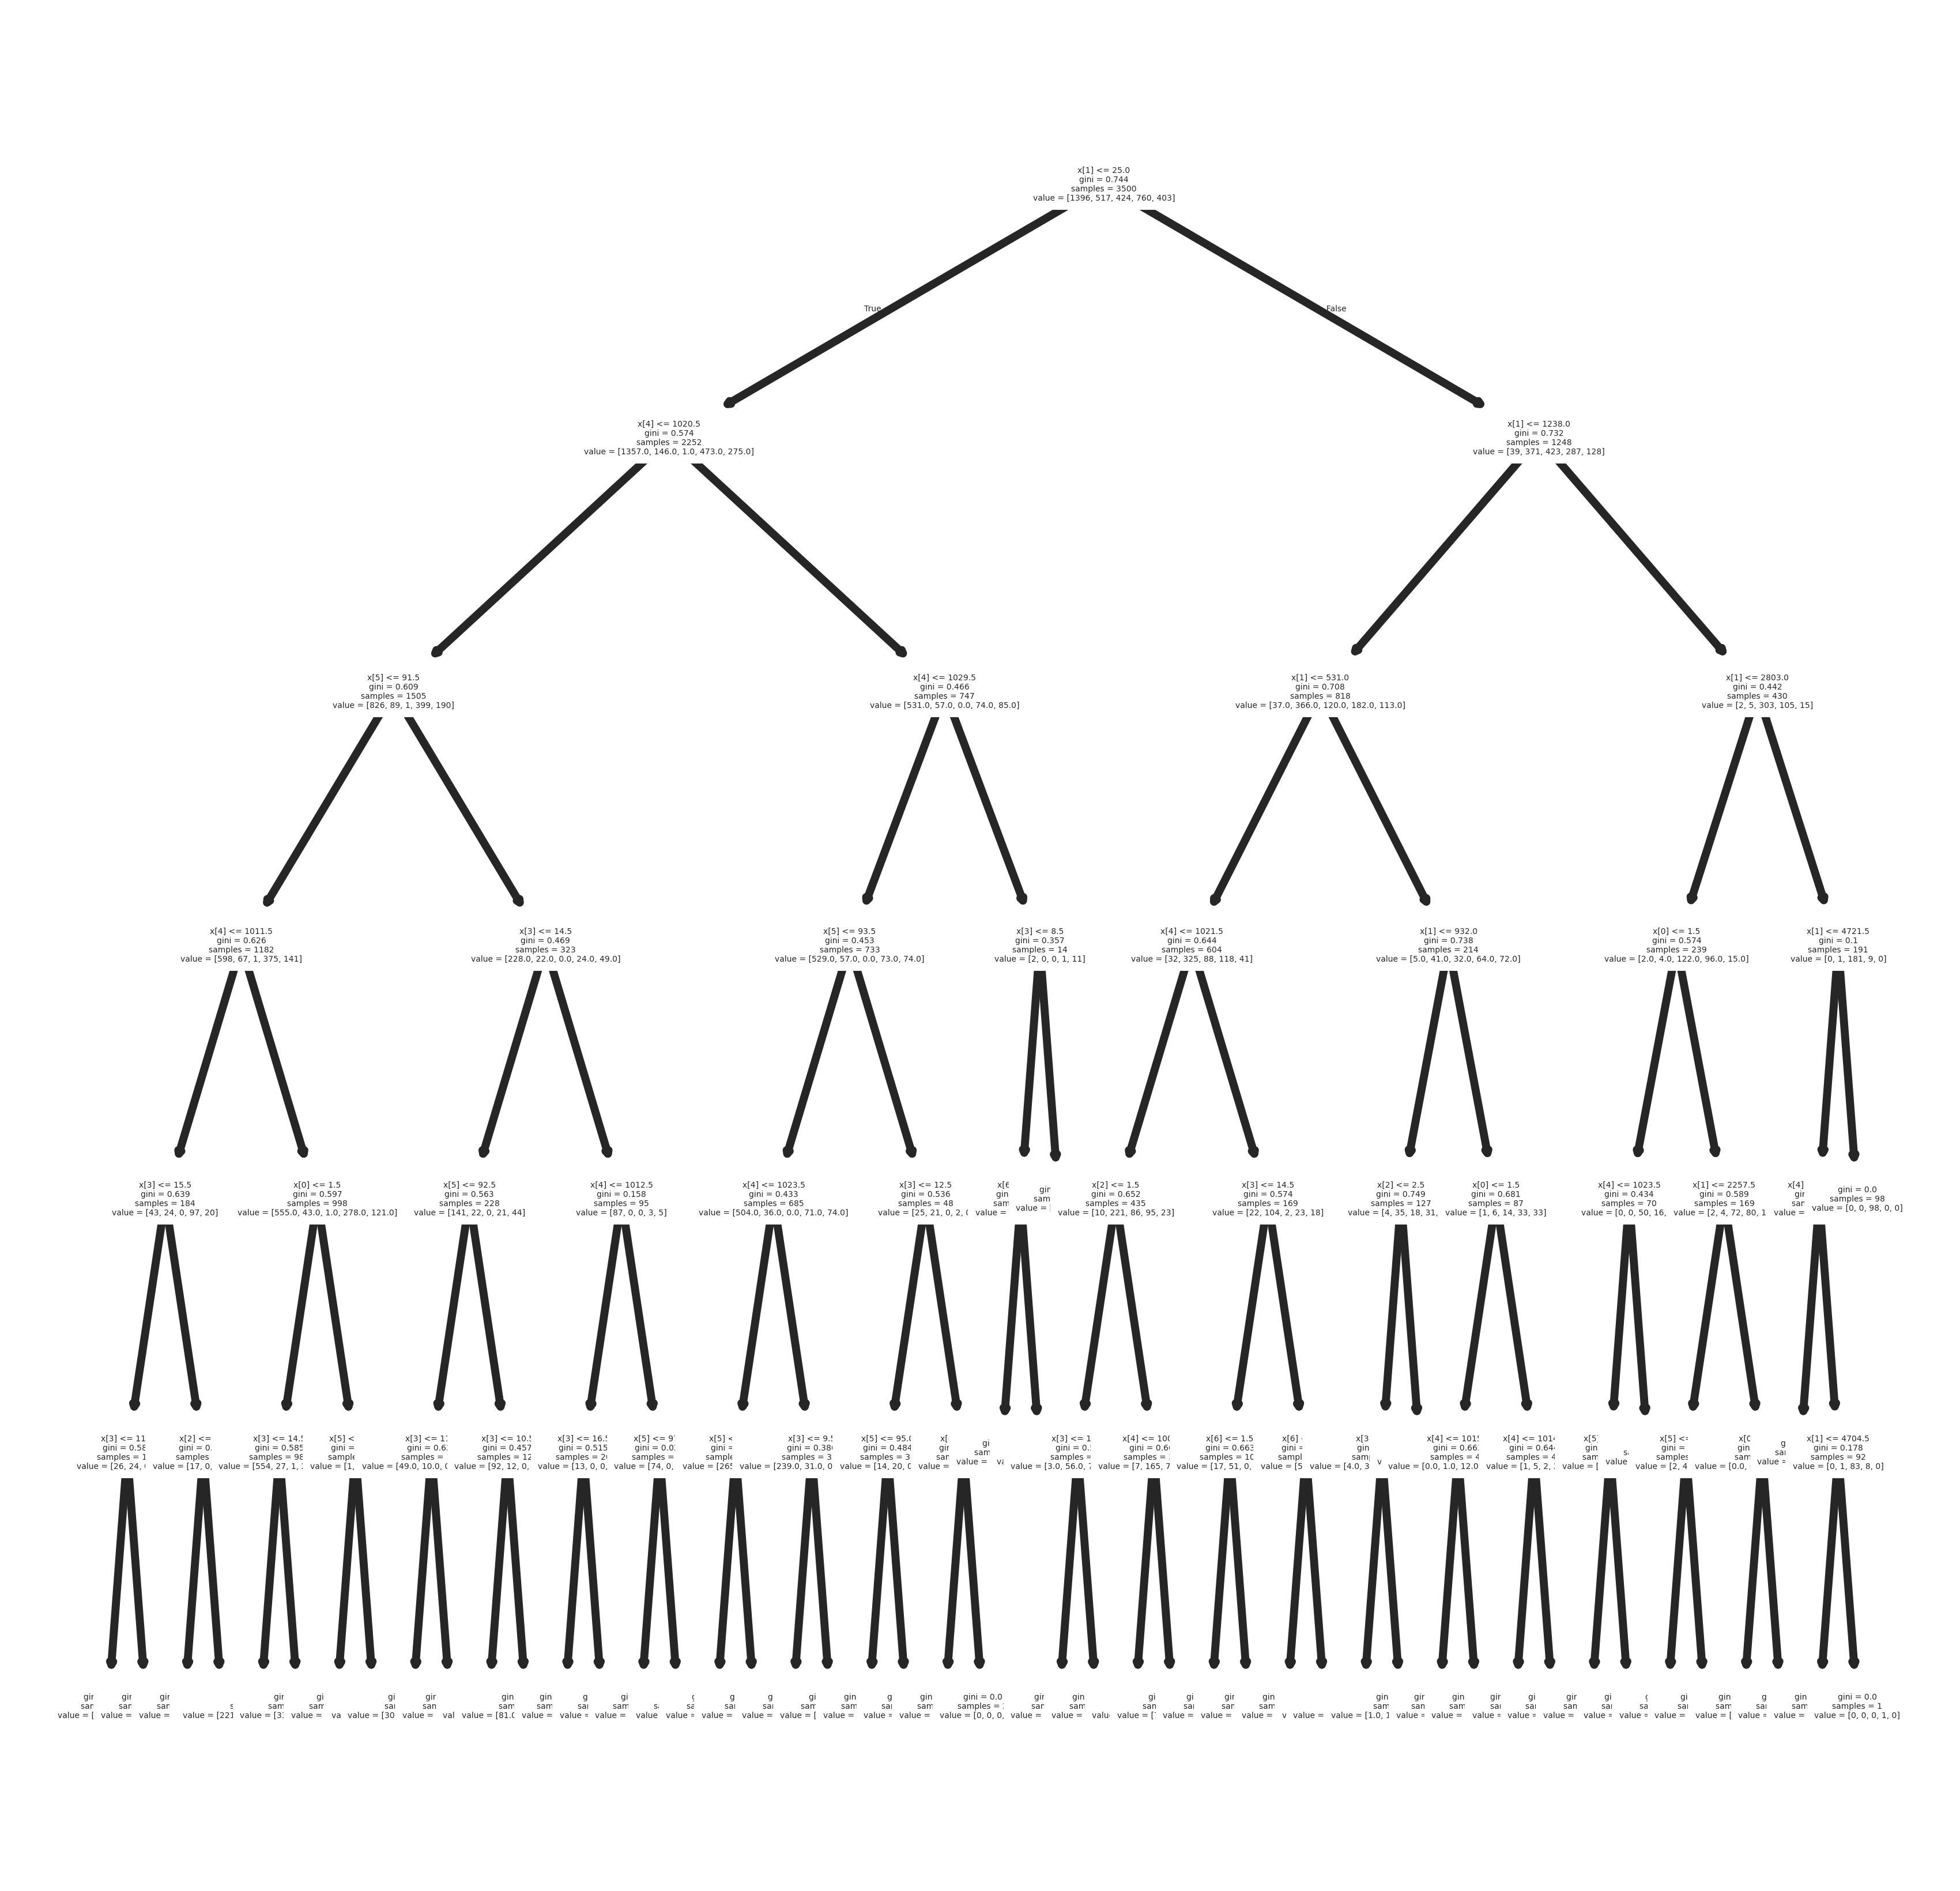

In [53]:
fig = plt.figure(figsize=(4,4), dpi=1000)
tree.plot_tree(max_depth_tree)
plt.show()

#fig.savefig()

*Model evaluation*

In [54]:
print(classification_report(y_test, max_depth_tree.predict(X_test)))

              precision    recall  f1-score   support

           1       0.68      0.93      0.78       632
           2       0.55      0.71      0.62       201
           3       0.79      0.75      0.77       179
           4       0.52      0.22      0.31       313
           5       0.40      0.16      0.23       175

    accuracy                           0.64      1500
   macro avg       0.59      0.55      0.54      1500
weighted avg       0.61      0.64      0.60      1500



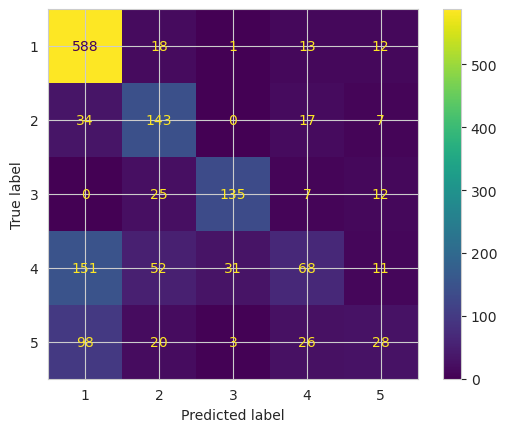

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, max_depth_tree.predict(X_test))
plt.show()

*Post-Pruning: **ccp_alpha***

In [56]:
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]

In [58]:
ccp_alphas

array([0.00000000e+00, 1.90476190e-05, 2.38095238e-05, 3.78151261e-05,
       4.76190476e-05, 6.66666667e-05, 7.14285714e-05, 7.14285714e-05,
       7.61904762e-05, 7.61904762e-05, 8.57142857e-05, 9.52380952e-05,
       9.52380952e-05, 9.52380952e-05, 9.52380952e-05, 9.52380952e-05,
       1.08843537e-04, 1.14285714e-04, 1.22448980e-04, 1.36645963e-04,
       1.39097744e-04, 1.40394089e-04, 1.42857143e-04, 1.58730159e-04,
       1.59663866e-04, 1.61904762e-04, 1.63265306e-04, 1.70068027e-04,
       1.71428571e-04, 1.71428571e-04, 1.71428571e-04, 1.72397220e-04,
       1.74603175e-04, 1.74603175e-04, 1.75824176e-04, 1.77777778e-04,
       1.79271709e-04, 1.80952381e-04, 1.82539683e-04, 1.82857143e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 1.90476190e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 1.90476190e-04,
       1.90476190e-04, 1.90476190e-04, 1.90476190e-04, 1.90476190e-04,
       2.11640212e-04, 2.11640212e-04, 2.11764706e-04, 2.14285714e-04,
      

In [59]:
estimator_pru.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

*Hyperparameters to test: **ccp_alpha***

In [60]:
param_grid_pru2 = {'ccp_alpha': [alpha for alpha in ccp_alphas]}
estimator_pru2 = DecisionTreeClassifier(random_state=2022)
ccp_alpha_gs = GridSearchCV(estimator_pru2, param_grid_pru2)

In [61]:
ccp_alpha_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'ccp_alpha': [0.0, 1.9047619047619165e-05,
                                       2.380952380952382e-05,
                                       3.781512605042028e-05,
                                       4.761904761904764e-05,
                                       6.66666666666668e-05,
                                       7.142857142857141e-05,
                                       7.142857142857141e-05,
                                       7.619047619047612e-05,
                                       7.619047619047612e-05,
                                       8.571428571428564e-05,
                                       9.523809523809517e-05,
                                       9.523809523809...
                                       9.523809523809528e-05,
                                       9.523809523809528e-05,
                                       0.00010884353741496611,
                                       0.00011428571428571434,
                                       0.00012244897959183695,
                                       0.00013664596273291928,
                                       0.00013909774436090213,
                                       0.00014039408866995095,
                                       0.00014285714285714281,
                                       0.00015873015873015873,
                                       0.00015966386554621846,
                                       0.00016190476190476184,
                                       0.000163265306122449,
                                       0.00017006802721088437,
                                       0.0001714285714285713,
                                       0.0001714285714285713, ...]})

*Best parameters and best estimator*

In [62]:
ccp_alpha_gs.best_params_

{'ccp_alpha': 0.0008316875137151618}

In [63]:
best_ccp_alpha_tree = ccp_alpha_gs.best_estimator_
print(best_ccp_alpha_tree)

DecisionTreeClassifier(ccp_alpha=0.0008316875137151618, random_state=2022)


<Figure size 4000x4000 with 0 Axes>

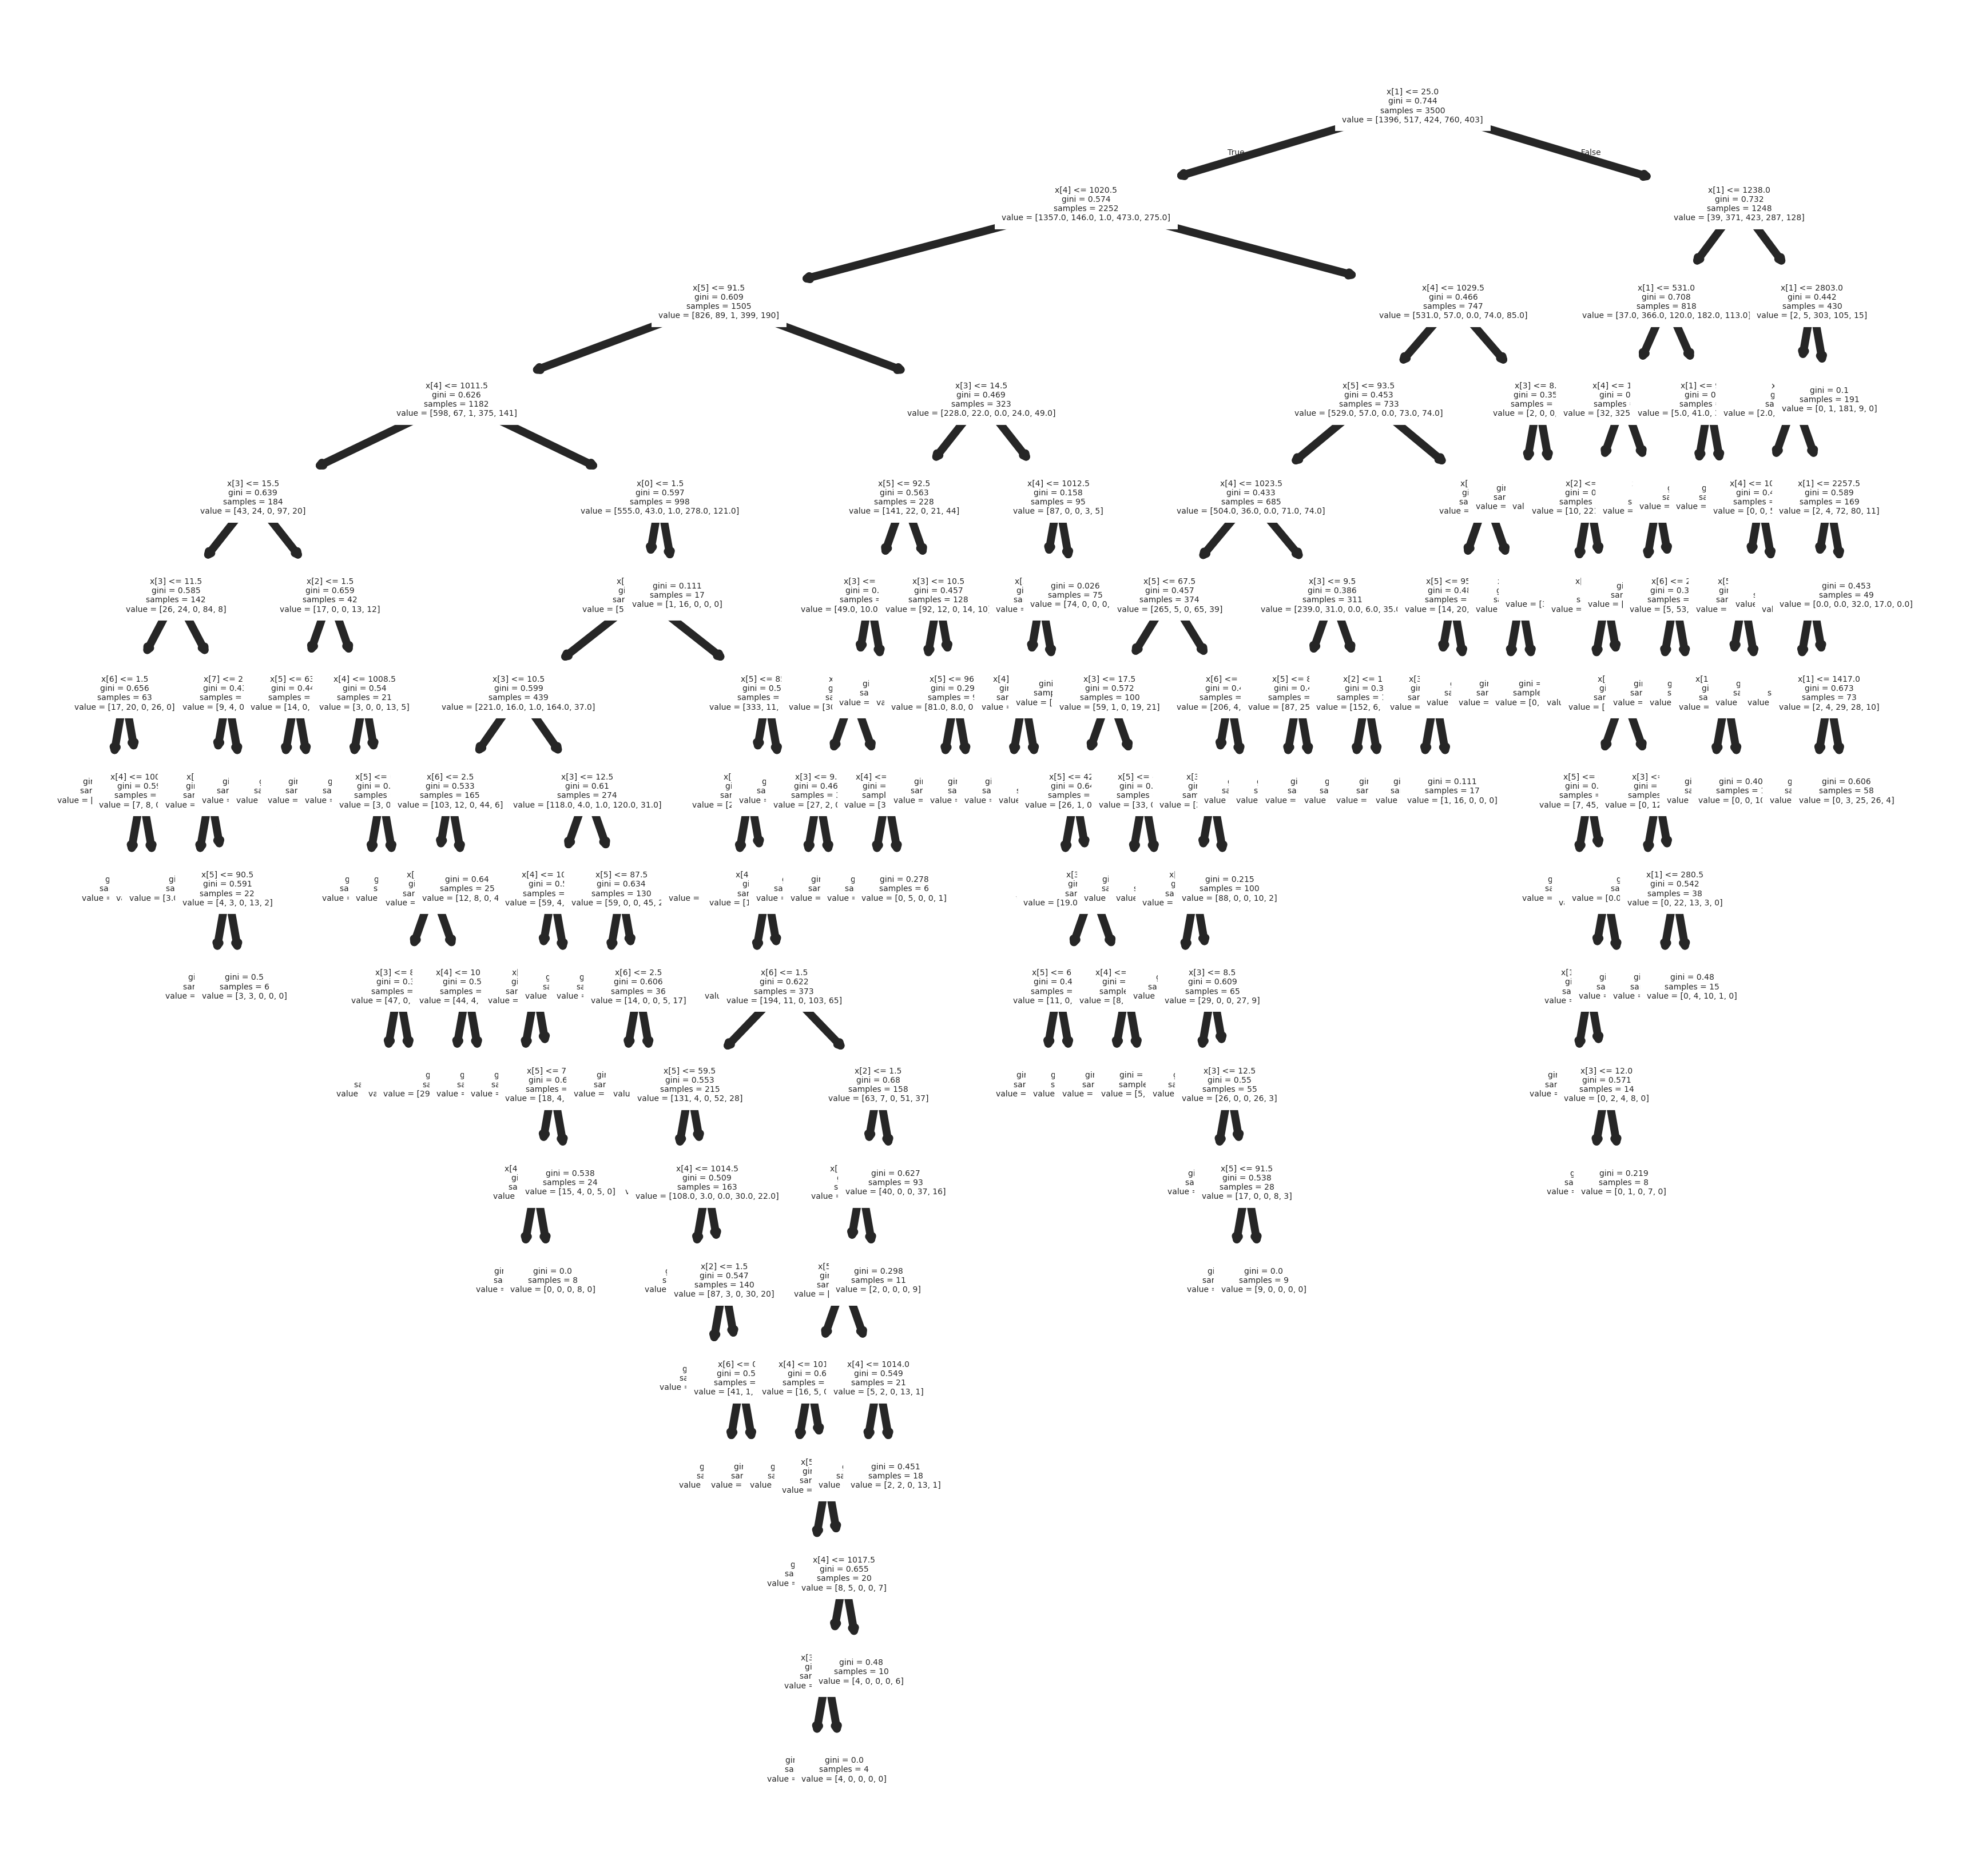

In [65]:
fig = plt.figure(figsize=(4,4), dpi=1000)
tree.plot_tree(best_ccp_alpha_tree)
plt.show()

#fig.savefig()

*Model evaluation*

In [67]:
print(classification_report(y_test, best_ccp_alpha_tree.predict(X_test)))

              precision    recall  f1-score   support

           1       0.72      0.82      0.76       632
           2       0.56      0.63      0.59       201
           3       0.78      0.74      0.76       179
           4       0.53      0.33      0.41       313
           5       0.38      0.39      0.39       175

    accuracy                           0.63      1500
   macro avg       0.59      0.58      0.58      1500
weighted avg       0.62      0.63      0.62      1500



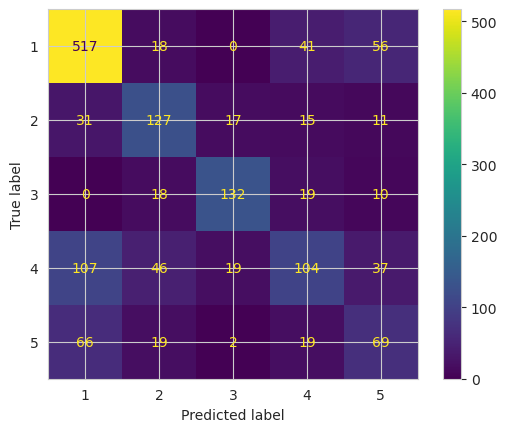

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, best_ccp_alpha_tree.predict(X_test))
plt.show()